# Ecommerce Customer Spending Analysis  
## Linear Regression Project

This project analyzes customer behavior data from an ecommerce company that operates
both a **mobile application** and a **website**.

Customers can interact with the company by:
- Visiting physical stores for personal styling sessions
- Purchasing products later via the mobile app or website

### Business Objective
The main goal of this analysis is to determine **whether the company should focus more
on improving its mobile app experience or its website**, based on customer spending behavior.

To achieve this, we use **Exploratory Data Analysis (EDA)** and a **Linear Regression model**
to understand which factors most strongly influence **Yearly Amount Spent**.


## Libraries Used

The following Python libraries are used in this project:

- **pandas**: data loading and manipulation  
- **numpy**: numerical operations  
- **matplotlib & seaborn**: data visualization  
- **scikit-learn**: machine learning modeling and evaluation  


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_theme(style="whitegrid")

## Data Loading

The dataset contains **customer-level information** including session behavior,
time spent on different platforms, membership duration, and yearly spending.

We load the dataset from the `data/` directory.

In [3]:
df = pd.read_csv("../data/EcommerceCustomers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Initial Observations

- Each row represents a single customer
- The dataset includes both **numerical** and **categorical** features
- Our target variable is **Yearly Amount Spent**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Dataset Structure

- The dataset contains **500 customer records**
- All numerical columns are stored as `float`
- There are **no missing values**, which means no data cleaning is required

In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Statistical Summary

From the summary statistics we observe:

- Customers spend on average around **$499 per year**
- Time spent on the app and website varies across users
- Length of membership shows a wide range, suggesting different loyalty levels

## Exploratory Data Analysis (EDA)

EDA helps us understand:
- Relationships between variables
- Which features may be strong predictors of yearly spending

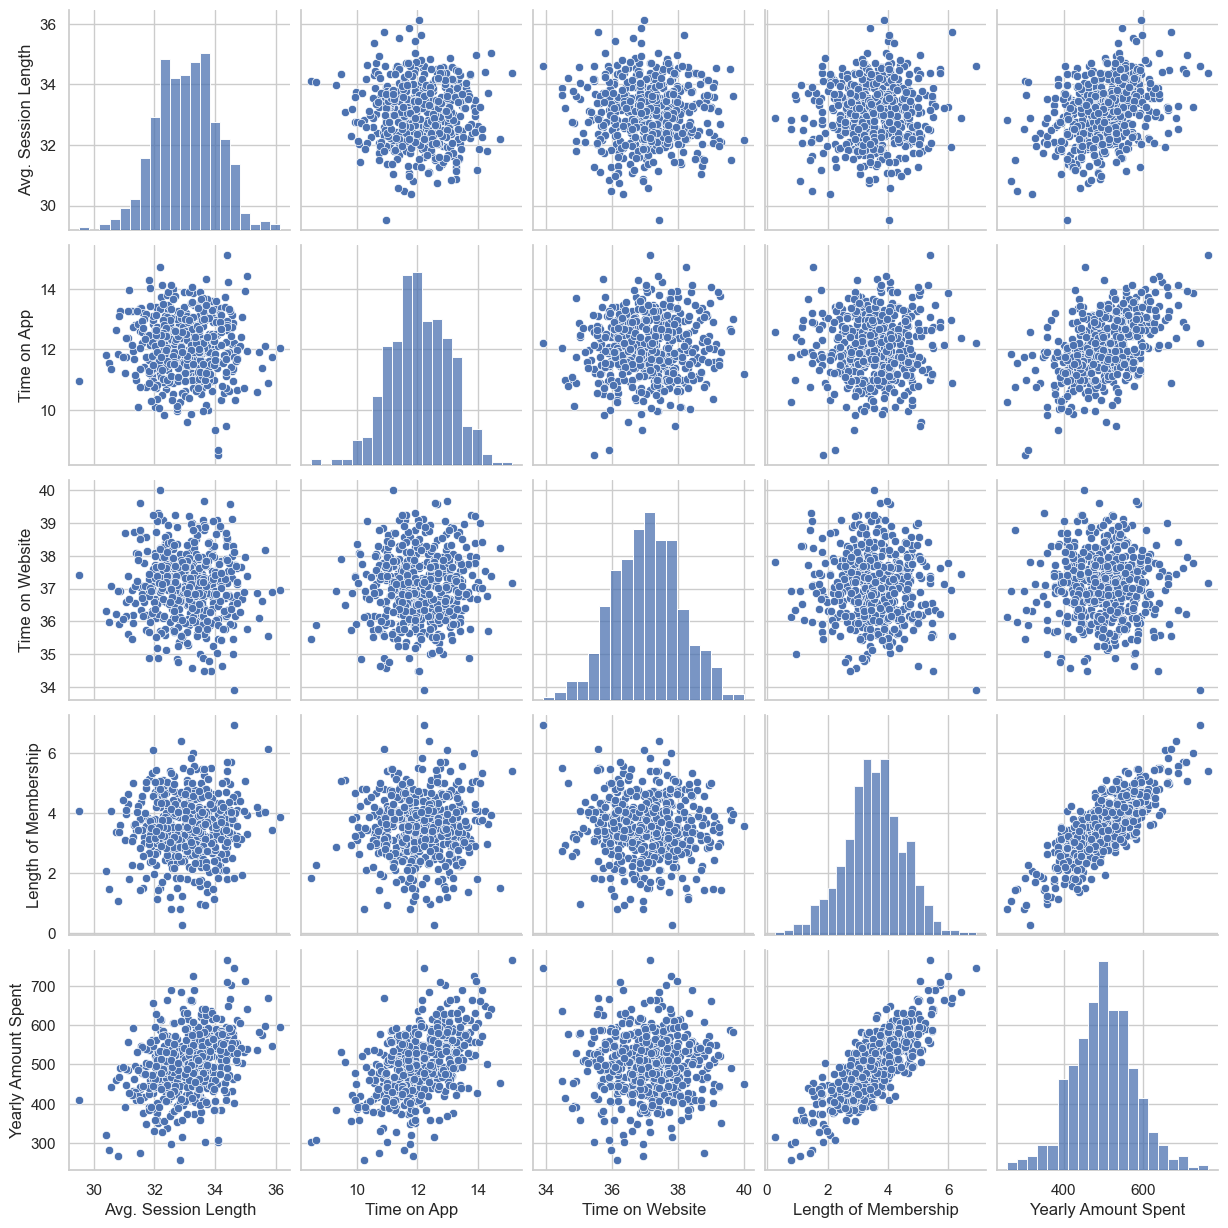

In [7]:
sns.pairplot(df)
plt.show()

### Pairplot Insights

- **Length of Membership** appears to have a strong linear relationship
  with **Yearly Amount Spent**
- Time spent on the app also shows a positive trend
- Website time appears less strongly correlated

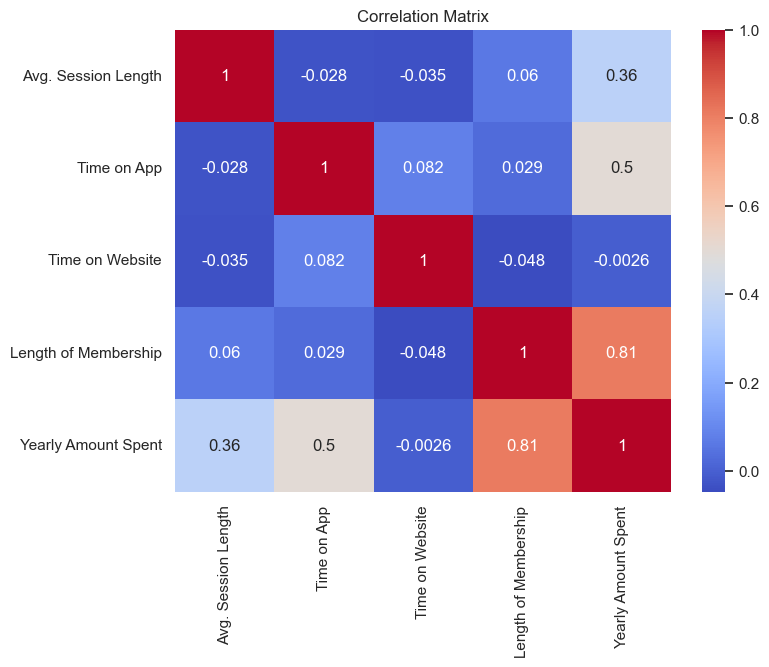

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Correlation Analysis

- The strongest correlation with yearly spending is **Length of Membership**
- **Time on App** shows a higher correlation than **Time on Website**
- This already suggests that the mobile app may have a stronger influence

## Feature Selection

We select the following features for our model:

- Avg. Session Length  
- Time on App  
- Time on Website  
- Length of Membership  

These variables represent user engagement and loyalty, which are expected
to influence customer spending.

In [9]:
X = df[[
    "Avg. Session Length",
    "Time on App",
    "Time on Website",
    "Length of Membership"
]]

y = df["Yearly Amount Spent"]

## Train-Test Split

The dataset is split into training and testing sets to evaluate
the model's performance on unseen data.

We use **30% of the data for testing**.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

## Linear Regression Model

We use a Linear Regression model to understand the relationship
between customer behavior features and yearly spending.

In [11]:
lm = LinearRegression()
lm.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Model Predictions

We generate predictions on the test dataset and compare them
with actual spending values.

In [13]:
predictions = lm.predict(X_test)

In [25]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

## Actual vs Predicted Values

To better understand model performance, we compare the **actual yearly spending**
values with the **model’s predictions** for a subset of customers.


In [17]:
comparison_df = pd.DataFrame({
    "Actual Spending": y_test.values,
    "Predicted Spending": predictions
})

comparison_df.head(10)

,Actual Spending,Predicted Spending
0,401.033135,403.669931
1,534.777188,542.577563
2,418.602742,427.065917
3,503.978379,502.024604
4,410.069611,410.121436
5,557.608262,569.934425
6,538.941975,531.934313
7,514.336558,506.296510
8,408.620188,408.718707
9,475.015407,473.977371


## Visualization: Actual vs Predicted Spending

A scatter plot helps visualize how close the model's predictions are
to the actual values. Ideally, points should align along a diagonal line.

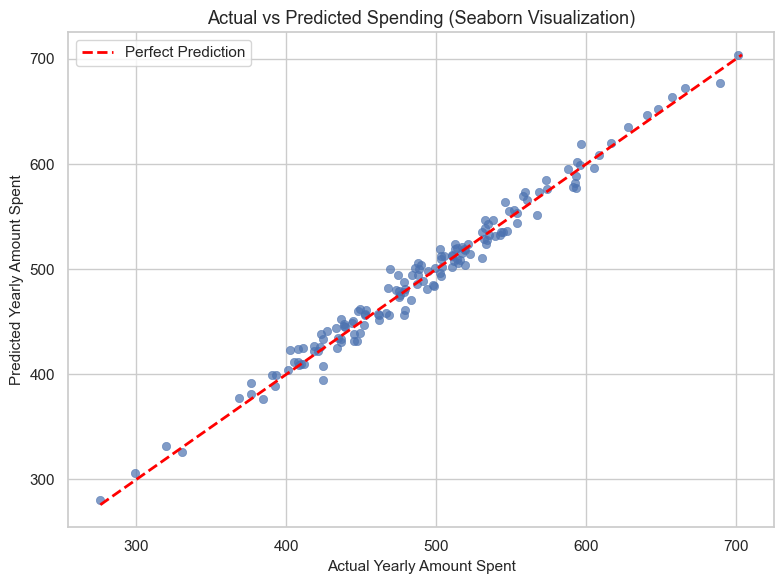

In [26]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=y_test,
    y=predictions,
    alpha=0.7,
    edgecolor=None
)

# Perfect prediction line
max_val = max(y_test.max(), predictions.max())
min_val = min(y_test.min(), predictions.min())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Perfect Prediction"
)

plt.xlabel("Actual Yearly Amount Spent", fontsize=11)
plt.ylabel("Predicted Yearly Amount Spent", fontsize=11)
plt.title("Actual vs Predicted Spending (Seaborn Visualization)", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

## Model Evaluation

We evaluate the model using standard regression metrics:
- MAE
- MSE
- RMSE
- R² Score

In [15]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)

mae, mse, rmse, r2

(8.42609164143212,
 103.91554136503332,
 np.float64(10.193897260863155),
 0.9808757641125855)

## Model Performance Interpretation

- The relatively low **MAE** indicates that prediction errors are small on average.
- The **R² score** suggests that a large portion of variance in yearly spending
  is explained by the selected features.
- Overall, the model is suitable for generating **business insights**,
  though it is not intended for precise individual-level predictions.

## Residual Analysis

Residuals represent the difference between actual values and model predictions.
Analyzing residuals helps assess whether the model assumptions are reasonable.

In [19]:
residuals = y_test - predictions

### Residual Distribution

A well-performing linear regression model should have residuals
that are approximately normally distributed around zero.

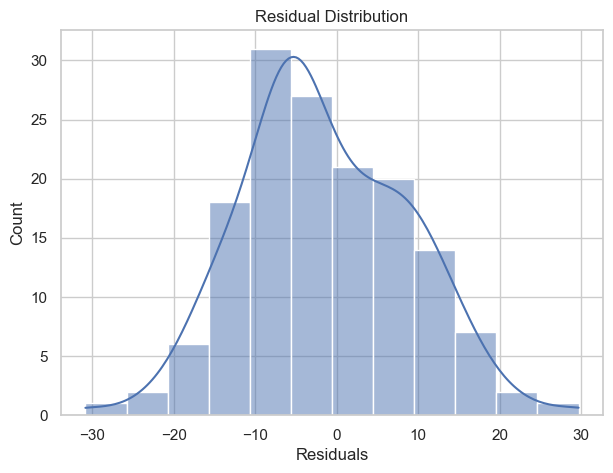

In [20]:
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

### Residuals vs Predicted Values

This plot helps detect patterns in prediction errors.
A random scatter indicates a well-fitted model.

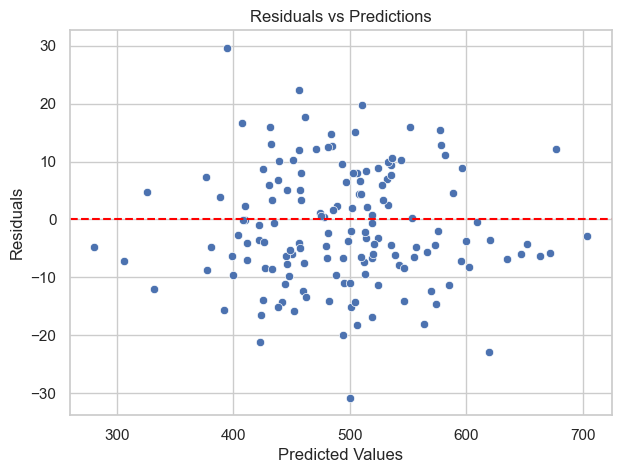

In [21]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()

## Model Interpretation

The coefficients below show how much each feature contributes
to yearly spending when other variables are held constant.

In [16]:
coef_df = pd.DataFrame(
    lm.coef_,
    X.columns,
    columns=["Coefficient"]
).sort_values("Coefficient", ascending=False)

coef_df

,Coefficient
Length of Membership,61.674732
Time on App,38.597135
Avg. Session Length,25.724256
Time on Website,0.459148


## Final Business Recommendation

Based on the linear regression results:

- **Length of Membership** is the strongest predictor of yearly spending
- **Time on App** has a stronger positive impact than **Time on Website**

### Recommendation
The company should prioritize **improving the mobile app experience**,
as increased engagement on the app is more strongly associated with higher customer spending.

### Model Limitations

- The model assumes linear relationships between variables
- External factors such as promotions or seasonal behavior are not included
- Despite these limitations, the model provides reliable directional insights
  for strategic decision-making